In [1]:
from io import BytesIO
from skimage import io
from PIL import Image, ImageDraw
from skimage import img_as_float
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]] <class 'numpy.ndarray'>


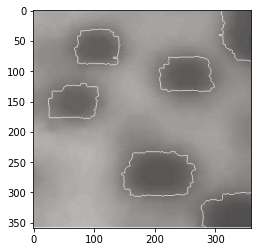

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('1.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(thresh, type(thresh))
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 20)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=7)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,0)
ret, sure_fg = cv2.threshold(dist_transform,0.35*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255, 255, 255]

plt.imshow(img, cmap="gray")

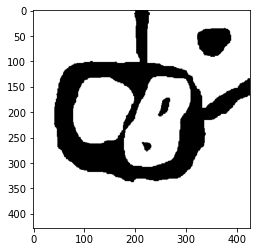

In [86]:
plt.imshow(opening, cmap="gray")

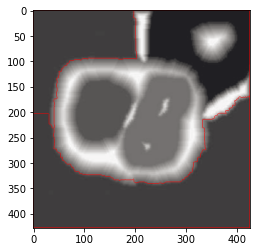

In [87]:
plt.imshow(img, cmap="gray")